### Importing modules and data sets

In [3]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
# get data file names and shape

path ='/home/mendis/Documents/Stock market/USA stocks'
filenames = glob.glob(path + "/*.csv")

# created a dictionary storing name and data of dataframs

df_dict = dict()
    
for files in filenames:
    file_name = files.replace(path,'').replace('/','').replace('.csv','')
    df = pd.read_csv(files)
    
    df_dict[file_name] = df

In [5]:
# Check if dataframes are working properly inside a dicitonary

for i in df_dict:
    print(i+": "+str(df_dict[i].shape))

NFLX: (4788, 7)
AAPL: (10202, 7)
FB: (2272, 7)
KHC: (1487, 7)
AMZN: (6050, 7)
KO: (14955, 7)
TWTR: (1902, 7)
TSLA: (2749, 7)
BAC: (12176, 7)
VZ: (9458, 7)


### Data cleaning

In [6]:
# As data is taken from the same source and all have equal number of columns, we can assume data have same columns.
# to be sure we'll check.

array = []

for company in df_dict:
    array = np.append(array,df_dict[company].columns)

unique_array = np.unique(array)
print(unique_array)
print(len(unique_array))

['Adj Close' 'Close' 'Date' 'High' 'Low' 'Open' 'Volume']
7


In [7]:
# let's check if data could be appended
array = []
for company in df_dict:
    print(df_dict[company].columns)

# as order or columns are equal of all the dataframes dataframes can be easily appended   

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


In [8]:
# Date should be converted in to a datetime type as it is currently and object
for company in df_dict:
    df_dict[company]['Date'] = pd.to_datetime(df_dict[company]['Date'])

# check type of each columsn
for company in df_dict:
    df_dict[company].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4788 entries, 0 to 4787
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       4788 non-null   datetime64[ns]
 1   Open       4788 non-null   float64       
 2   High       4788 non-null   float64       
 3   Low        4788 non-null   float64       
 4   Close      4788 non-null   float64       
 5   Adj Close  4788 non-null   float64       
 6   Volume     4788 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 262.0 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10202 entries, 0 to 10201
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       10202 non-null  datetime64[ns]
 1   Open       10202 non-null  float64       
 2   High       10202 non-null  float64       
 3   Low        10202 non-null  float64       
 4   Close

### Visualizing data and try to fit into a model

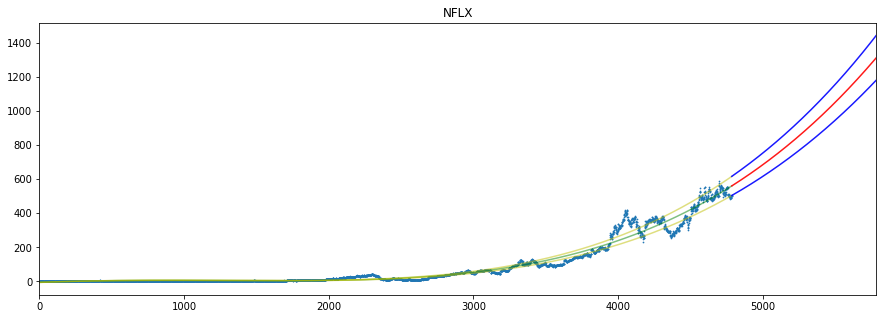

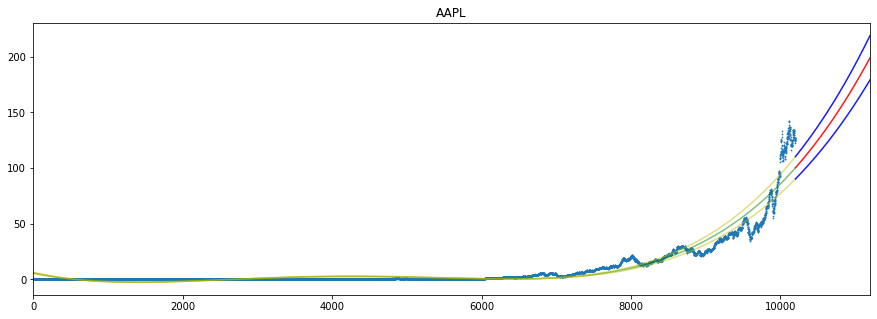

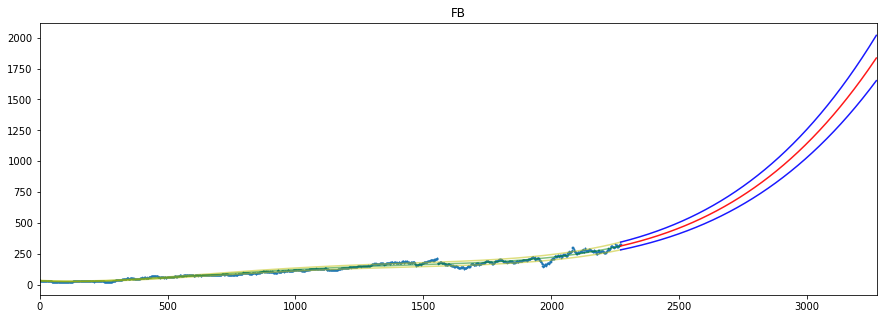

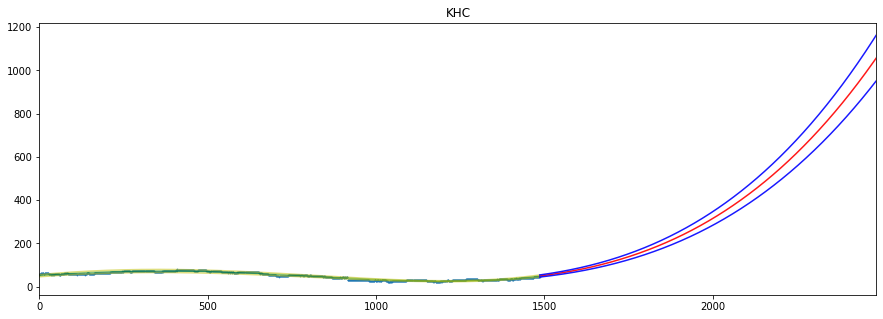

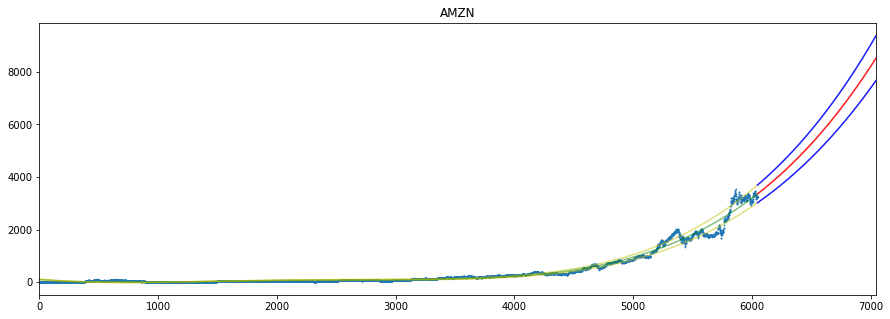

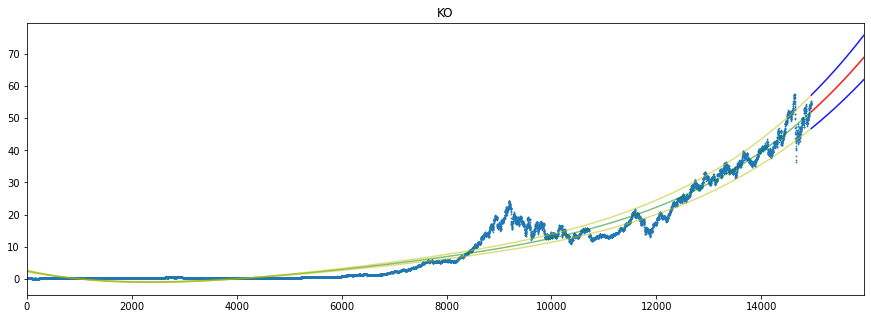

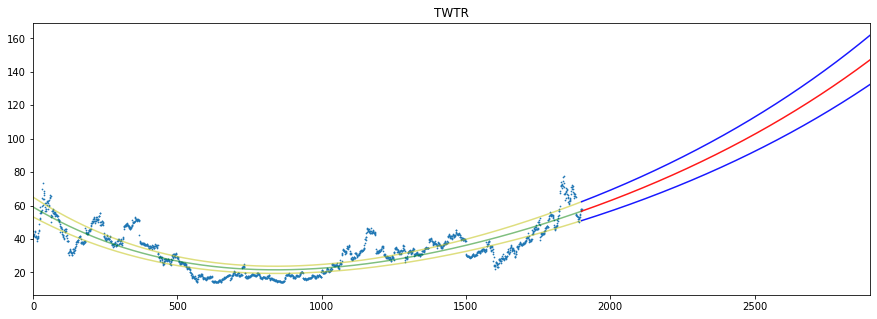

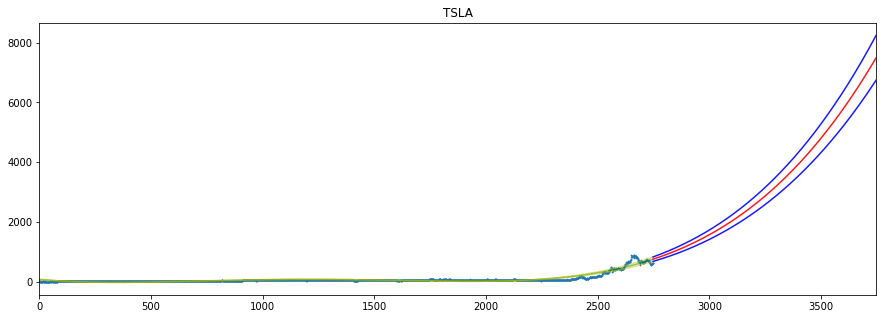

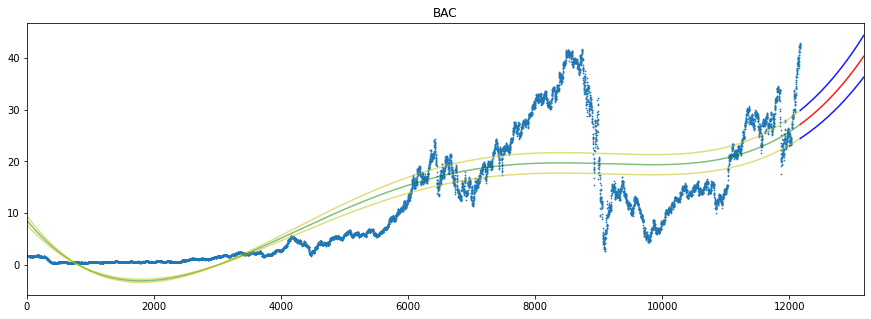

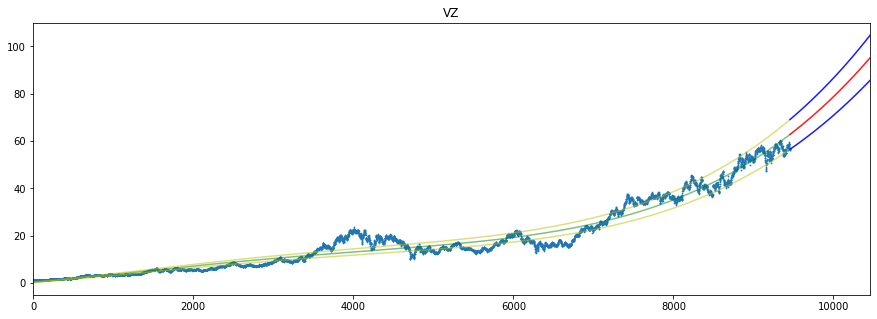

In [41]:
for company in df_dict:
    x = df_dict[company].index
    y = df_dict[company]['Adj Close']
    x_p = pd.Series(list(range(x.max(),x.max()+1000)))
    
    pos = list(df_dict).index(company)
    
    plt.figure(figsize=(15, 5))
    plt.scatter(x,y,s=0.5)
    plt.title(company)
    
    # polynomial reg degree 4
    a, b, c, d, e = np.polyfit(x,y,4)
    
    fit_equation = a*x**4 +b*x**3 + c*x**2 + d*x + e
    fit_equation_p = a*x_p**4 +b*x_p**3 + c*x_p**2 + d*x_p + e
    
    plt.plot(x, fit_equation , color = 'g', alpha = 0.5)
    plt.plot(x_p, fit_equation_p, color = 'r', alpha = 0.9)
    
    # polynomial reg degree error bars
    
    plt.plot(x, fit_equation*0.9 , color = 'y', alpha = 0.5)
    plt.plot(x_p, fit_equation_p*0.9, color = 'b', alpha = 0.9)
    
    plt.plot(x, fit_equation*1.1 , color = 'y', alpha = 0.5)
    plt.plot(x_p, fit_equation_p*1.1, color = 'b', alpha = 0.9)
    
    
    plt.xlim([0, max(x)+1000])
    plt.show()
    

In [33]:
y = df_dict['AAPL']['Adj Close']
x_p = pd.Series(list(range(x.max(),x.max()+1000)))
type(y)
type(x_p)

pandas.core.series.Series

In [11]:
series_country = df['Country'].unique()
countries = len(series_country)

for country in range(countries):
    select = df.loc[df['Country']==series_country[country]]
    x = np.array(select['Age At Start'].tolist())
    y = np.array(select['Average'].tolist())
    s = np.array(select['Std Dev'].tolist())*400
    
    
    plt.subplot(2, 3, country+1)
    plt.tight_layout()
    
    
    plt.scatter(x,y,s=s, alpha= 0.35)
    plt.title(series_country[country])
    

plt.suptitle("Growth vs Age")
plt.tight_layout()
plt.show()

KeyError: 'Country'

In [28]:
company_array = []
for company in df_dict:
    company_array = np.append(company_array,company)



In [82]:
4**2



16